## Taller

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

El Departamento de Transporte de Estados Unidos rastrea el rendimiento de los vuelos domésticos operados por las principales transportadoras aéreas del país. A continuación, se presentan los datos de los vuelos a tiempo, retrasados, cancelados y desvíados para el año 2015.

Primero, importemos los dataframes y hagamos una exploración.

In [2]:
aerolineas = pd.read_csv('./airlines.csv')

In [3]:
aerolineas.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


Este parece ser un diccionario de las aerolíneas y su código único IATA (Asociación Internacional de Transporte Aéreo).

In [4]:
aeropuertos = pd.read_csv('./airports.csv')
print(aeropuertos.shape)
aeropuertos.head()

(322, 7)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


En este caso tenemos la información de 322 aeropuertos como su código IATA, su nombre completo, la ciudad y el estado al que pertenecen así como sus coordenadas geográficas.

In [5]:
vuelos = pd.read_csv('./flights.csv')
print(vuelos.shape)
vuelos.head()

/var/folders/tv/6gts_jsj51v4kgr_f1gs96h80000gn/T/ipykernel_72386/11296599.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  vuelos = pd.read_csv('./flights.csv')


(5819079, 30)


,YEAR,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,AS,98,N407AS,ANC,SEA,5,2354.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,US,840,N171US,SFO,CLT,20,18.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,AA,258,N3HYAA,LAX,MIA,20,15.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,AS,135,N527AS,SEA,ANC,25,24.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Observe que tenemos 5,819,079 registros y aún así el tiempo de lectura fue corto. No obstante, como tenemos 31 columnas no es tan fácil visualizar toda la tabla. Para esto podemos cambiar el máximo número de columnas visualizadas utilizando:

In [6]:
pd.set_option('display.max_columns', 32)

In [7]:
vuelos.head()

,YEAR,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Veamos algunas descripciones de las columnas de los datos:

- **YEAR, MONTH, DAY**: Información sobre la fecha del vuelo.
- **AIRLINE**: Código IATA de la aerolínea.
- **FLIGHT_NUMBER**: Número del vuelo
- **TAIL_NUMBER**: Modelo del avión
- **ORIGIN_AIRPORT, DESTINATION_AIRPORT**: Código IATA del aeropuerto de origen y de destino respectivamente
- **SCHEDULED_DEPARTURE**: Hora del vuelo programada para la salida en formato 24H, es decir HHMM.
- **DEPARTURE_TIME**: Hora del vuelo real de la salida en formato 24H, es decir HHMM.
- **WHEELS OFF**: La hora a la que las llantas despegan. En format 24H (HHMM).
- **SCHEDULED_TIME**: El tiempo programado para la duración del vuelo.
- **AIR_TIME**: El tiempo que la aeronave estuvo en el aire en minutos.
- **DISTANCE**: La distancia recorrida en millas.
- **WHEELS_ON**: La hora a la que las llantas aterrizan. En format 24H (HHMM).
- **SCHEDULED_ARRIVAL**: Hora del vuelo programada para la llegada en formato 24H, es decir HHMM.
- **ARRIVAL_TIME**: Hora del vuelo real de la llegada en formato 24H, es decir HHMM.
- **DIVERTED, CANCELLED**: Si el vuelo fue desvíado o cancelado.
- **CANCELLATION_REASON**: Si el vuelo fue cancelado, indica la razón de su cancelación. Puede ser
    - _A_: Debido a problemas con la aerolínea.
    - _B_: Debido al clima.
    - _C_: Debido a restricciones del espacio aéreo (NAS)
    - _D_: Por razones de seguridad.
- **AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY**: Demoras en minutos debido al espacio aéreo, a la seguridad del viaje, a la aerolínea, a una aeronave tardía, al clima respectivamente.


1. ¿Cuál es el día de la semana dónde hay más vuelos retrasados? ¿Y más vuelos cancelados?

In [8]:
dict_day = {0: 'Lunes', 1:'Martes', 2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

In [9]:
vuelos['DIA_DE_SEMANA'] = pd.to_datetime(vuelos[['YEAR','MONTH','DAY']]).apply(lambda d: dict_day[d.day_of_week])

In [10]:
vuelos.head()

,YEAR,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DIA_DE_SEMANA
0,2015,1,1,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Jueves
1,2015,1,1,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Jueves
2,2015,1,1,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Jueves
3,2015,1,1,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Jueves
4,2015,1,1,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Jueves


In [19]:
dia_retraso = vuelos[vuelos['DEPARTURE_DELAY']>0].groupby('DIA_DE_SEMANA').count()['DAY'].sort_values(ascending=False)
print(f'El día con más vuelos retrasados es {dia_retraso.index[0]} con {dia_retraso.iloc[0]:,}.')

El día con más vuelos retrasados es Jueves con 334,387.


In [20]:
dia_cancelados = vuelos[vuelos['CANCELLED']==1].groupby('DIA_DE_SEMANA').count()['DAY'].sort_values(ascending=False)
print(f'El día con más vuelos cancelados es {dia_cancelados.index[0]} con {dia_cancelados.iloc[0]:,}.')

El día con más vuelos cancelados es Lunes con 21,073.


2. ¿Cuál es la aerolínea con más retrasos superiores a 45 min? ¿Y cancelaciones? Construya un gráfico de barras con el total de retrasos superiores a 45 min y cancelaciones por aerolínea?

In [22]:
retrasos = vuelos[vuelos['DEPARTURE_DELAY']>=45].groupby('AIRLINE').count()\
    .merge(aerolineas,left_on='AIRLINE',right_on='IATA_CODE',how='left')[['AIRLINE','YEAR']].rename(columns={'YEAR':'Retrasos mayores a 45min'})
cancelaciones = vuelos[vuelos['CANCELLED']==1].groupby('AIRLINE').count()\
    .merge(aerolineas,left_on='AIRLINE',right_on='IATA_CODE',how='left')[['AIRLINE','YEAR']].rename(columns={'YEAR':'Cancelaciones'})
retrasos = retrasos.merge(cancelaciones,on='AIRLINE')

In [24]:
retrasos.sort_values(by='Retrasos mayores a 45min',ascending=False).reset_index(drop=True)

,AIRLINE,Retrasos mayores a 45min,Cancelaciones
0,Southwest Airlines Co.,97362,16043
1,American Airlines Inc.,54684,10919
2,United Air Lines Inc.,54204,6573
3,Delta Air Lines Inc.,48621,3824
4,Atlantic Southeast Airlines,47990,15231
5,Skywest Airlines Inc.,47202,9960
6,JetBlue Airways,26702,4276
7,American Eagle Airlines Inc.,26384,15025
8,Spirit Air Lines,15529,2004
9,US Airways Inc.,11966,4067


<Axes: title={'center': 'Número de retrasos y cancelaciones por aerolínea'}, ylabel='AIRLINE'>

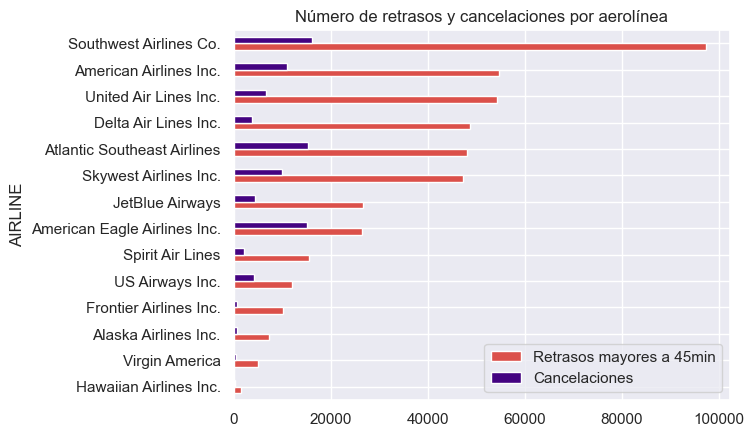

In [29]:
retrasos.sort_values(by='Retrasos mayores a 45min').plot(x='AIRLINE',
                                                         y=['Retrasos mayores a 45min','Cancelaciones'],
                                                         kind='barh',
                                                         color=['#db504a','#440381'],
                                                         title='Número de retrasos y cancelaciones por aerolínea')

In [30]:
aerolinea_mas_retrasos = retrasos.sort_values(by='Retrasos mayores a 45min',ascending=False).reset_index(drop=True).iloc[0]['AIRLINE']
aerolinea_mas_cancelaciones = retrasos.sort_values(by='Cancelaciones',ascending=False).reset_index(drop=True).iloc[0]['AIRLINE']
print(f'La aerolínea con más retrasos es {aerolinea_mas_retrasos} y la aerolínea {aerolinea_mas_cancelaciones} tuvo más cancelaciones.')

La aerolínea con más retrasos es Southwest Airlines Co. y la aerolínea Southwest Airlines Co. tuvo más cancelaciones.


3. Construya las distribuciones de la velocidad promedio (km/h) y la distancia (km) recorrida en los vuelos? ¿Cuál es la mediana de la velocidad promedio?

In [32]:
vuelos['DISTANCE_KM'] = vuelos['DISTANCE']*1.60934

In [33]:
vuelos['VELOCIDAD_PROMEDIO'] = vuelos['DISTANCE_KM']/(vuelos['AIR_TIME']/60)

<Axes: title={'center': 'Distancia'}, ylabel='Frequency'>

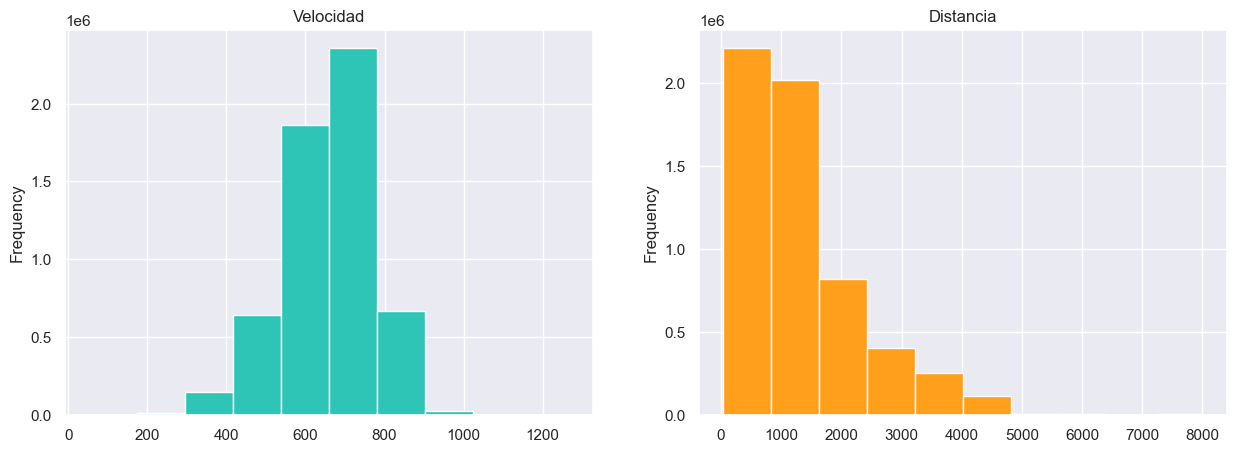

In [34]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

vuelos.VELOCIDAD_PROMEDIO.plot(kind='hist',ax=axs[0],title='Velocidad',color='#2EC4B6')
vuelos.DISTANCE_KM.plot(kind='hist',ax=axs[1],title='Distancia',color='#ff9f1c')

In [35]:
print(f'La mediana de la velocidad promedio es {vuelos.VELOCIDAD_PROMEDIO.median():.2f} km/h.')

La mediana de la velocidad promedio es 668.74 km/h.


4. Construya el mapa de calor de correlaciones para las variables de *VELOCIDAD_PROMEDIO, DISTANCE, AIR_TIME, TAXI_OFF, DEPARTURE_DELAY, ARRIVAL_DELAY*. ¿Cuáles tienen una correlación negativa?

<Axes: >

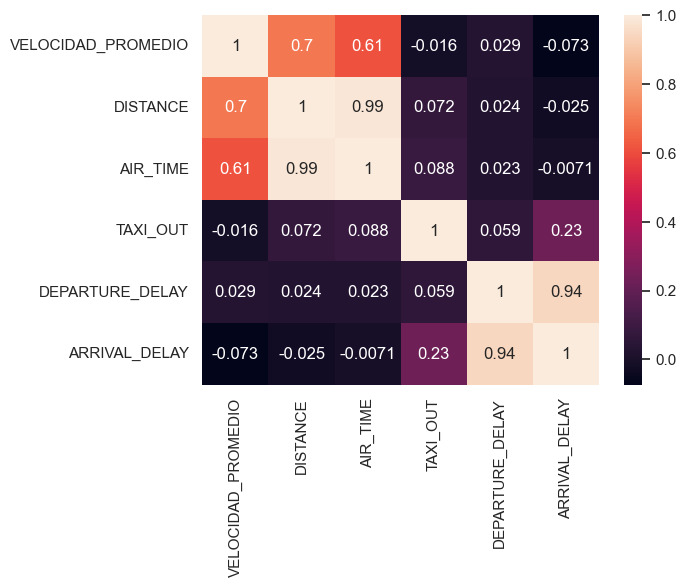

In [36]:
corr = vuelos[['VELOCIDAD_PROMEDIO','DISTANCE','AIR_TIME','TAXI_OUT','DEPARTURE_DELAY','ARRIVAL_DELAY']].corr()
sns.heatmap(corr,annot=True)

In [37]:
corr_neg = corr[corr<0].stack().reset_index().rename(columns={'level_0':'V1','level_1':'V2',0:'CORR'}).drop_duplicates(subset='CORR')
corr_neg['VAR'] = corr_neg['V1']+'-'+corr_neg['V2']
print(f'Las variables con correlación negativa son: {", ".join(corr_neg.VAR.values)}.')

Las variables con correlación negativa son: VELOCIDAD_PROMEDIO-TAXI_OUT, VELOCIDAD_PROMEDIO-ARRIVAL_DELAY, DISTANCE-ARRIVAL_DELAY, AIR_TIME-ARRIVAL_DELAY.


5. Construya un gráfico de barras de la suma de la distancia total que recorrió cada aerolínea.

<Axes: title={'center': 'Distancia recorrida total'}, ylabel='AIRLINE'>

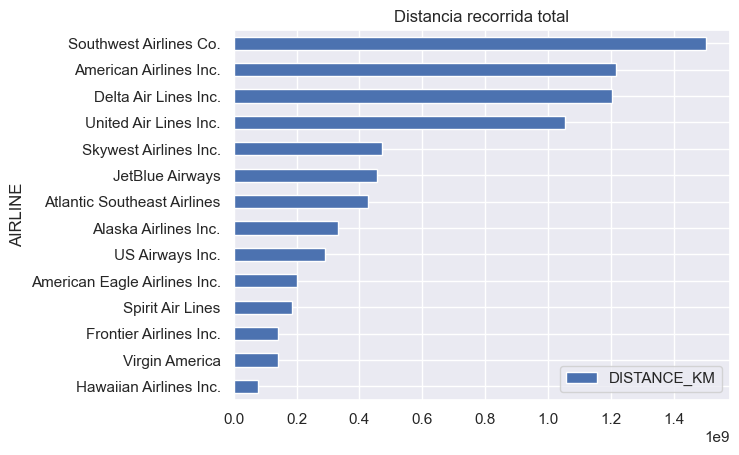

In [38]:
vuelos[['AIRLINE','DISTANCE_KM']].groupby('AIRLINE').sum().reset_index().merge(aerolineas,left_on='AIRLINE',right_on='IATA_CODE').\
    drop(columns=['AIRLINE_x','IATA_CODE']).rename(columns={'AIRLINE_y':'AIRLINE'}).sort_values(by='DISTANCE_KM').\
        plot(kind='barh',x='AIRLINE',y='DISTANCE_KM',title='Distancia recorrida total')

6. Los retrasos son comunmente clasificados en: _ligero retraso_ (hasta 15 min), _retraso medio_ (de 15 a 45 min) y _retraso severo_ (mayor a 45 min). Utilizando estas categorías construya un gráfico de barras del número de estos tipos de retraso de llegada para los 5 aeropuertos de destino con mayor número de vuelos.

In [39]:
aeropuertos_principales = vuelos['DESTINATION_AIRPORT'].value_counts().reset_index().iloc[:5].DESTINATION_AIRPORT.values
aeropuertos_principales

array(['ATL', 'ORD', 'DFW', 'DEN', 'LAX'], dtype=object)

In [40]:
vuelos['TIPO_RETRASO'] = np.nan
vuelos.loc[(vuelos['ARRIVAL_DELAY']<15) & (vuelos['ARRIVAL_DELAY']>0),'TIPO_RETRASO'] = 'Ligero retraso'
vuelos.loc[(vuelos['ARRIVAL_DELAY']>=15) & (vuelos['ARRIVAL_DELAY']<45),'TIPO_RETRASO'] = 'Retraso medio'
vuelos.loc[(vuelos['ARRIVAL_DELAY']>=45),'TIPO_RETRASO'] = 'Retraso severo'

/var/folders/tv/6gts_jsj51v4kgr_f1gs96h80000gn/T/ipykernel_72386/2515309680.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Ligero retraso' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  vuelos.loc[(vuelos['ARRIVAL_DELAY']<15) & (vuelos['ARRIVAL_DELAY']>0),'TIPO_RETRASO'] = 'Ligero retraso'


In [41]:
retrasos_aeropuerto = vuelos.loc[(vuelos['DESTINATION_AIRPORT'].isin(aeropuertos_principales)) & ~(vuelos['TIPO_RETRASO'].isna()),['DESTINATION_AIRPORT','TIPO_RETRASO']]\
    .merge(aeropuertos[['IATA_CODE','AIRPORT']],left_on='DESTINATION_AIRPORT',right_on='IATA_CODE').drop(columns=['IATA_CODE','DESTINATION_AIRPORT'])\
        .groupby('AIRPORT').value_counts().reset_index()
retrasos_aeropuerto.head()

,AIRPORT,TIPO_RETRASO,count
0,Chicago O'Hare International Airport,Ligero retraso,45337
1,Chicago O'Hare International Airport,Retraso medio,30789
2,Chicago O'Hare International Airport,Retraso severo,28098
3,Dallas/Fort Worth International Airport,Ligero retraso,39150
4,Dallas/Fort Worth International Airport,Retraso medio,24371


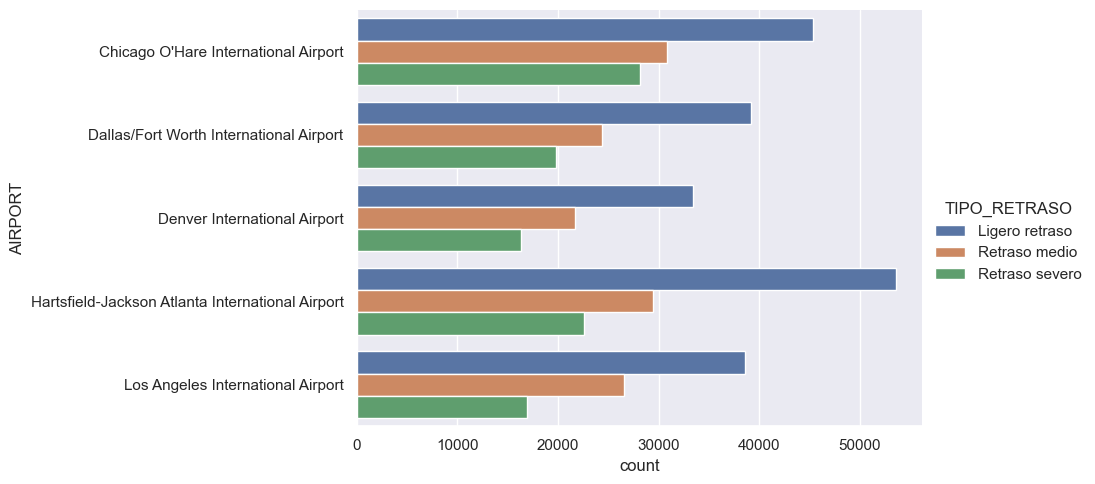

In [42]:
catplot = sns.catplot(data=retrasos_aeropuerto,kind='bar',y='AIRPORT',x='count',hue='TIPO_RETRASO',orient='h',height=5,aspect=2)

7. ¿Qué ciudad tiene más vuelos cancelados debido al clima como una proporción de los vuelos totales por ciudad?

In [43]:
vuelos_totales = vuelos[['ORIGIN_AIRPORT']].merge(aeropuertos,left_on='ORIGIN_AIRPORT',right_on='IATA_CODE').groupby('CITY').count()['ORIGIN_AIRPORT']
vuelos_cancelados_clima = vuelos[vuelos['CANCELLATION_REASON']=='B'][['ORIGIN_AIRPORT']].merge(aeropuertos,left_on='ORIGIN_AIRPORT',right_on='IATA_CODE').groupby('CITY').count()['ORIGIN_AIRPORT']
vuelos_proporcion = (vuelos_cancelados_clima/vuelos_totales).sort_values(ascending=False)

In [44]:
print(f'La ciudad {vuelos_proporcion.index[0]} tiene más poporción de vuelos cancelados debido al clima ({vuelos_proporcion[0]:.2%}).')

La ciudad Mammoth Lakes tiene más poporción de vuelos cancelados debido al clima (8.97%).


/var/folders/tv/6gts_jsj51v4kgr_f1gs96h80000gn/T/ipykernel_72386/2713674578.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'La ciudad {vuelos_proporcion.index[0]} tiene más poporción de vuelos cancelados debido al clima ({vuelos_proporcion[0]:.2%}).')


8. Elabore un gráfico de línea de las 5 aerolíneas con más retrasos para ver su total de retrasos por mes a lo largo del año.

In [45]:
aerolineas_mas_retrasadas = vuelos.dropna(subset='TIPO_RETRASO')\
    .groupby('AIRLINE').count()['DAY'].sort_values(ascending=False).iloc[:5].index

In [49]:
total_retrasos = vuelos[(vuelos.AIRLINE.isin(aerolineas_mas_retrasadas))&~(vuelos['TIPO_RETRASO'].isna())]\
    .groupby(['AIRLINE','MONTH']).count()['ARRIVAL_DELAY']\
        .reset_index()\
            .rename(columns={'ARRIVAL_DELAY':'TOTAL_RETRASOS'})
total_retrasos = total_retrasos.merge(aerolineas,left_on='AIRLINE',right_on='IATA_CODE',how='left').drop(columns='AIRLINE_x').rename(columns={'AIRLINE_y':'AIRLINE'})
total_retrasos.head()

,MONTH,TOTAL_RETRASOS,IATA_CODE,AIRLINE
0,1,17957,AA,American Airlines Inc.
1,2,15251,AA,American Airlines Inc.
2,3,18683,AA,American Airlines Inc.
3,4,16213,AA,American Airlines Inc.
4,5,15660,AA,American Airlines Inc.


<Axes: xlabel='MONTH', ylabel='TOTAL_RETRASOS'>

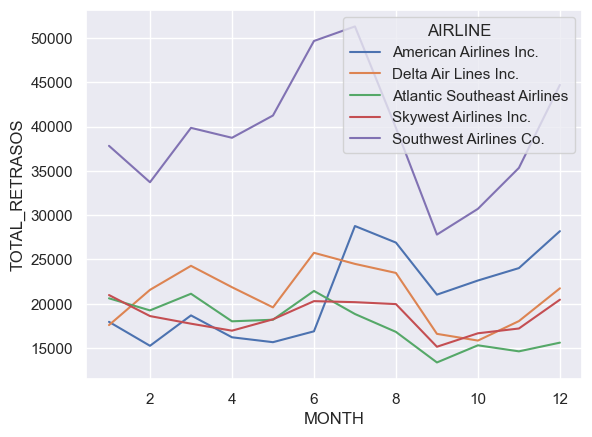

In [50]:
sns.lineplot(data=total_retrasos,x='MONTH',y='TOTAL_RETRASOS',hue='AIRLINE')